In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
trans_data = pd.read_csv('imbalanced_data.csv')
trans_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0


In [4]:
import matplotlib.pyplot as plt
type(trans_data)
frauds = list(trans_data['isFraud'])
frauds

# print(frauds)
count_0 = 0
count_1 = 0
for i in frauds:
    if(i==0):
       count_0 += 1
    else:
        count_1 += 1
print(count_0)
print(count_1)
print('Percentage frauds:',count_1/count_0)

objects = ('Frauds', 'Non-Frauds')
y_pos = np.arange(len(objects))
performance = [count_1,count_0/100]
plt.bar(y_pos, performance, align='center', alpha=0.3)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Frauds')
plt.show()

6354407
8213
Percentage frauds: 0.0012924888191769902


<Figure size 640x480 with 1 Axes>

Types of transactions that have Frauds:  ['TRANSFER', 'CASH_OUT']


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.00,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.00,C824009085,70253.00,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.00,C2001112025,25742.00,0.00,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.20,C1937962514,517.00,8383.29,0,0


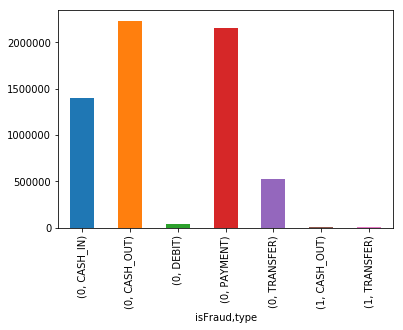

In [5]:
# the below data nad plot shows the distribution of the fraud transactions in the type of data

# types of fraud transactions
fraud_trans = list(trans_data.loc[trans_data.isFraud==1].type.drop_duplicates().values)
print('Types of transactions that have Frauds: ',fraud_trans)

# plot for the same
fraud_count = trans_data.groupby(['isFraud','type']).size().plot(kind='bar')

# removing the data which do not have fraudalant transactions
trans_data_new = trans_data.loc[(trans_data['type'].isin(['TRANSFER','CASH_OUT'])),:] 
trans_data_new

In [49]:
# this is to get the independent varaibles
X = trans_data_new.drop(columns=['isFraud'])

# # removing the columns with low co-relation coefficient
X = X.drop(columns=['nameOrig','nameDest','step'])

# # Handling the categorical column using dummies in python
X = pd.get_dummies(X,columns=['type'],drop_first=True)

# # getting the dependent variable
y = pd.DataFrame(trans_data_new['isFraud'])

# print(X)

# # getting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Accuracy and recall using logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
#recall_score(y_test, y_pred)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[909766,   1722],
       [   761,   1986]], dtype=int64)

In [50]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
# recall_score(y_test, y_pred)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[818339,  93149],
       [    70,   2677]], dtype=int64)

In [51]:
# from imblearn.under_sampling import NearMiss
# nm = NearMiss()
# X_train,y_train = nm.fit_sample(X_train,y_train)
# np.bincount(y_train)
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# print(accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
# print(recall_score(y_test, y_pred))

array([[818339,  93149],
       [    70,   2677]], dtype=int64)

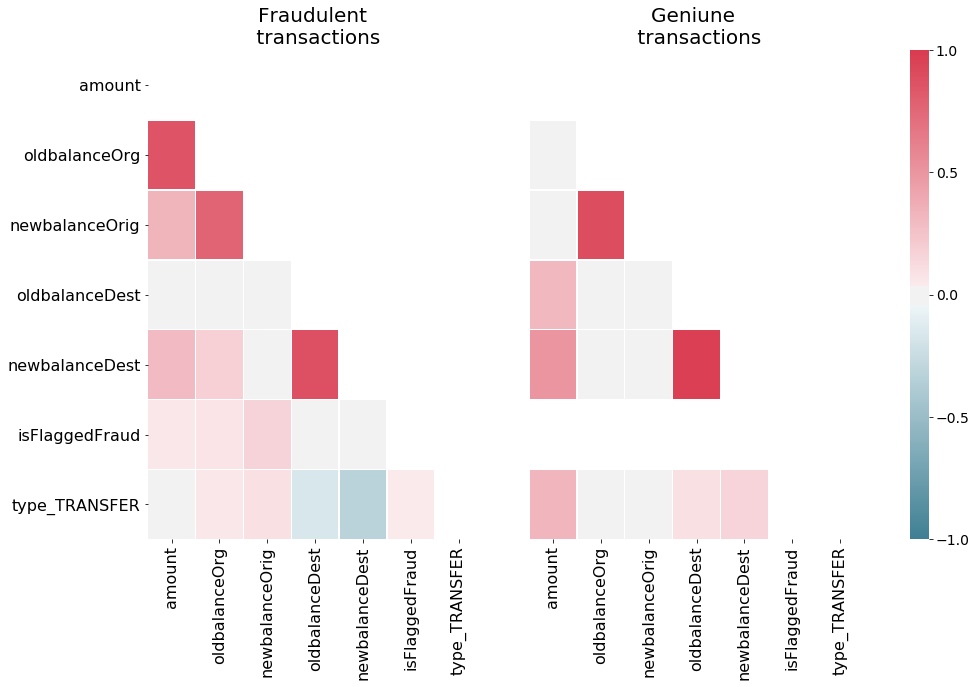

In [47]:
# print(y.head())
import seaborn as sns
Xfraud = X.loc[y['isFraud']==1] # update Xfraud & XnonFraud with cleaned data
Xnonfraud = X.loc[y['isFraud']==0]
                  
correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationFraud)
indices = np.triu_indices_from(correlationFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Fraudulent \n transactions', size = 20)

correlationnonFraud = Xnonfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationnonFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Geniune \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);